# **先匯入鐵達尼號資料 / Importing Data Sets**
# **(kaggle_titanic_train/kaggle_titanic_test)**

In [17]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle_titanic_test.csv to kaggle_titanic_test (2).csv
Saving kaggle_titanic_train.csv to kaggle_titanic_train (2).csv
User uploaded file "kaggle_titanic_test.csv" with length 29474 bytes
User uploaded file "kaggle_titanic_train.csv" with length 61194 bytes


# **建立隨機森林模型 / Building Random Forest Model**

In [18]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score

# 載入資料 / reading csv files
url_train = "/content/kaggle_titanic_train.csv"
url_test = "/content/kaggle_titanic_test.csv"
titanic_train = pd.read_csv(url_train)
titanic_test = pd.read_csv(url_test)

# 將 Age 遺漏值以 median 填補 / Fill the void of the column "Age" with median
age_median_train = np.nanmedian(titanic_train["Age"])
new_Age_train = np.where(titanic_train["Age"].isnull(), age_median_train, titanic_train["Age"])
titanic_train["Age"] = new_Age_train
titanic_train

age_median_test = np.nanmedian(titanic_test["Age"])
new_Age_test = np.where(titanic_test["Age"].isnull(), age_median_test, titanic_test["Age"])
titanic_test["Age"] = new_Age_test
titanic_test

# 創造 dummy variables / Create dummy variables for the column "Sex"
titanic_train_sex = pd.get_dummies(titanic_train["Sex"])

titanic_test_sex = pd.get_dummies(titanic_test["Sex"])

# 建立 x_train & x_val & x_test / Creating training set, validation set, and test set of X
df1 = pd.DataFrame([titanic_train["Pclass"], titanic_train["Age"]]).T
df2 = df1.join(titanic_train_sex, how='outer')
df3 = df2.join(titanic_train["Survived"])
df4 = pd.DataFrame([titanic_test["Pclass"], titanic_test["Age"]]).T
df5 = df4.join(titanic_test_sex, how='outer')
df6 = df5.join(titanic_test["Survived"])

N = len(df3)
N1 = int(4 * N / 5) # 切分為4：1 / Divide df3 into two sets using a ratio of 4:1, 4 being the training set and 1 being the validation set
x_train = df3.iloc[:N1, :-1]
x_val = df3.iloc[N1:, :-1]
x_test = df6.iloc[:, :-1]

# 建立 train_Y & valid_Y &test_Y / Creating training set, validation set, and test set of Y
y_train = df3.iloc[:N1, -1]
y_val = df3.iloc[N1:, -1]
y_test = df6.iloc[:, -1]

# 標準化 / Regularization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)
x_test_std = sc.transform(x_test)


# 建立 random forest 模型 / Building the random forest model
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train_std, y_train)

# 先對validation做跑分 / Score the model using the validation set
y_predict_val = model.predict(x_val_std)
print(f'The score for this model is {model.score(x_val_std, y_val):.6f}.')
recall = recall_score(y_val, y_predict_val, average=None).sum()
print(f'The recall for this model is {recall:.6f}.')

# 績效 / Evaluation of model on the validation set
accuracy = metrics.accuracy_score(y_val, y_predict_val)
print(accuracy)
print(y_predict_val)

The score for this model is 0.821229.
The recall for this model is 1.597011.
0.8212290502793296
[1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1]


In [19]:
# 這邊可以用迴圈調整參數：tree number (n_estimators)=i*100 & Z值。
# 利用迴圈調整參數對val不斷跑分，找出理想模型
# Use loop to adjust the parameter tree number (n_estimators)=i*100 and Z to find the best model (scoring each model with the validation set)

In [20]:
# 再利用test做模型驗證跑分 / Score the model using the test set
y_predict = model.predict(x_test_std)
print(f'The score for this model is {model.score(x_test_std, y_test):.6f}.') #這邊其實就是後面的accuracy
recall = recall_score(y_test, y_predict, average=None).sum()
print(f'The recall for this model is {recall:.6f}.') #這兩行其實就是後面的recall rate
print(y_predict)

The score for this model is 0.863636.
The recall for this model is 1.723684.
[0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 0 1 1 1 0 1 0 0 0]


# **輸出機率分類判斷 / Probability for each X(1~3)**

In [21]:
prob_val = np.round(model.predict_proba(x_val_std),4)
prob_test = np.round(model.predict_proba(x_test_std),4)
print(prob_val)
print("-----------------------------")
print(prob_test)

[[0.12   0.88  ]
 [0.598  0.402 ]
 [1.     0.    ]
 [0.8825 0.1175]
 [0.04   0.96  ]
 [0.89   0.11  ]
 [0.904  0.096 ]
 [1.     0.    ]
 [0.     1.    ]
 [0.9975 0.0025]
 [0.7531 0.2469]
 [0.995  0.005 ]
 [0.3529 0.6471]
 [0.7768 0.2232]
 [0.     1.    ]
 [0.4064 0.5936]
 [1.     0.    ]
 [0.7608 0.2392]
 [0.0067 0.9933]
 [0.7279 0.2721]
 [0.7923 0.2077]
 [1.     0.    ]
 [1.     0.    ]
 [0.9628 0.0372]
 [0.97   0.03  ]
 [0.0191 0.9809]
 [0.904  0.096 ]
 [0.904  0.096 ]
 [0.7578 0.2422]
 [0.1893 0.8107]
 [0.01   0.99  ]
 [0.8578 0.1422]
 [0.5001 0.4999]
 [1.     0.    ]
 [0.8594 0.1406]
 [0.     1.    ]
 [0.9633 0.0367]
 [0.5001 0.4999]
 [0.01   0.99  ]
 [0.98   0.02  ]
 [1.     0.    ]
 [0.9882 0.0118]
 [0.     1.    ]
 [0.02   0.98  ]
 [0.904  0.096 ]
 [0.9817 0.0183]
 [1.     0.    ]
 [0.     1.    ]
 [0.904  0.096 ]
 [1.     0.    ]
 [0.7768 0.2232]
 [0.     1.    ]
 [0.8594 0.1406]
 [0.4849 0.5151]
 [0.7578 0.2422]
 [0.5853 0.4147]
 [0.904  0.096 ]
 [0.4958 0.5042]
 [0.8578 0.142

# **混淆矩陣 / Confusion Matrix**

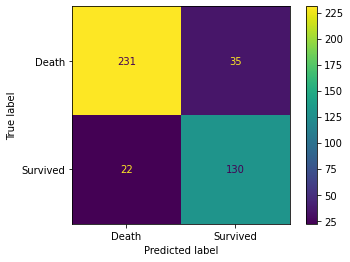

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score
import matplotlib.pyplot as plt
target_names = ['Death', 'Survived']
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

# **隨機森林模型績效 / Evaluation**

## **AUC**


*   AUC = 1，是完美分類器。
*   AUC = [0.85, 0.95]，效果很好
*   AUC = [0.7, 0.85]，效果一般
*   AUC = [0.5, 0.7]，效果較低，但用於預測股票已經很不錯了
*   AUC = 0.5，跟隨機猜測一樣（例：丟銅板），模型沒有預測價值。
*   AUC < 0.5，比隨機猜測還差；但只要總是反預測而行，就優於隨機猜測。

In [23]:
# 績效
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
auc = metrics.auc(fpr, tpr)
print(auc)
if auc == 1.0:
  print("完美分類器 / Perfect")
elif auc < 1.0 and auc >= 0.85:
  print("效果很好 / Good")
elif auc < 0.85 and auc >= 0.70:
  print("效果一般 / Normal")
elif auc < 0.70 and auc >= 0.50:
  print("效果較低 / Low")
elif auc == 0.50:
  print("沒有預測價值 / No Value")
else:
  print("請進行反預測 / Please act oppositely to the prediction!")

0.8618421052631579
效果很好 / Good


## **Accuracy & Recall Rate**

In [24]:
print(classification_report(y_test, y_predict, target_names=target_names, digits=6))

              precision    recall  f1-score   support

       Death   0.913043  0.868421  0.890173       266
    Survived   0.787879  0.855263  0.820189       152

    accuracy                       0.863636       418
   macro avg   0.850461  0.861842  0.855181       418
weighted avg   0.867529  0.863636  0.864725       418



In [25]:
# 附註：回去翻test資料，266名男性都死了，152名女性全數存活。
# Note: According to the test set, all 266 males died and all 152 females survived.